In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Data

In [71]:

data = pd.read_csv('https://raw.githubusercontent.com/nalie-linda/IU_project1/main/PSP_Jan_Feb_2019.csv')
print(data.head())

   Unnamed: 0                 tmsp  country  amount  success         PSP  \
0           0  2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1  2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2  2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3  2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4  2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [72]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50410 non-null  int64 
 1   tmsp        50410 non-null  object
 2   country     50410 non-null  object
 3   amount      50410 non-null  int64 
 4   success     50410 non-null  int64 
 5   PSP         50410 non-null  object
 6   3D_secured  50410 non-null  int64 
 7   card        50410 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.1+ MB


### Data Quallity checks 
1. Missing values: There are no missing values.
2. Data type conversions
3. Handle any outliers or any values that are not valid
4. Check for duplicates

In [73]:
#convert tmsp to datetime
data['tmsp'] = pd.to_datetime(data['tmsp'], format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [74]:
data['amount'].describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

In [75]:
#unique values for card variable
data['card'].unique()

array(['Visa', 'Diners', 'Master'], dtype=object)

In [76]:
#unique values for PSP variable
data['PSP'].unique()

array(['UK_Card', 'Simplecard', 'Moneycard', 'Goldcard'], dtype=object)

### Exploratory Data analysis

Explore Data: Perform exploratory data analysis (EDA) to visualize distributions, 
correlations, and relationships between features and the target variable.
1. Distribution of success  among the different PSPs: Success rate is low among all PSPs as seen from the graph.
2. Distribution of success among each card type
3. Distribution of success rate and failure rate in each country for each PSP
4. Distribution of success among 3D secured cards

In [77]:
data['success'].value_counts()

success
0    40182
1    10228
Name: count, dtype: int64

In [78]:
psp_counts = data.groupby(['PSP', 'success']).size().unstack().fillna(0)
print(psp_counts)

success         0     1
PSP                    
Goldcard     1905  1303
Moneycard    6482  1815
Simplecard  10478  1968
UK_Card     21317  5142


<Figure size 1200x600 with 0 Axes>

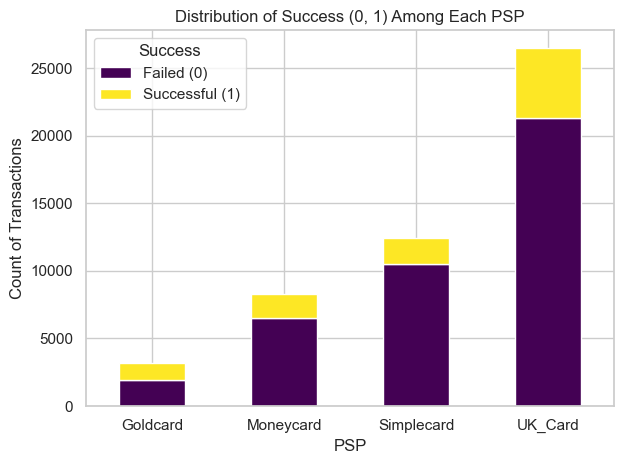

In [79]:
# visualizing the distribution of success among each PSP
plt.figure(figsize=(12, 6))
psp_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Success (0, 1) Among Each PSP')
plt.xlabel('PSP')
plt.ylabel('Count of Transactions')
plt.legend(title='Success', labels=['Failed (0)', 'Successful (1)'])
plt.xticks(rotation=0)
plt.tight_layout()

In [80]:
#Distribution of success rate by card
card_counts = data.groupby(['card', 'success']).size().unstack().fillna(0)
print(card_counts)

success      0     1
card                
Diners    7590  2178
Master   23379  5623
Visa      9213  2427


<Figure size 1200x600 with 0 Axes>

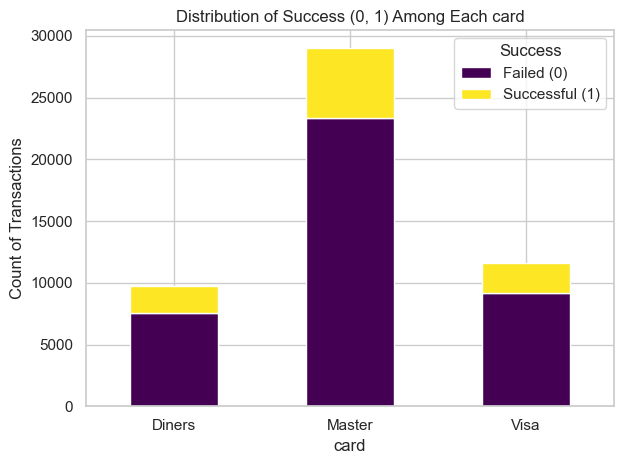

In [81]:
# Plotting the distribution of success among each card
plt.figure(figsize=(12, 6))
card_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Success (0, 1) Among Each card')
plt.xlabel('card')
plt.ylabel('Count of Transactions')
plt.legend(title='Success', labels=['Failed (0)', 'Successful (1)'])
plt.xticks(rotation=0)
plt.tight_layout()

In [82]:
cards_3D = data.groupby(['3D_secured', 'success']).size().unstack().fillna(0)
print(cards_3D)

success         0     1
3D_secured             
0           31120  7279
1            9062  2949


<Figure size 1200x600 with 0 Axes>

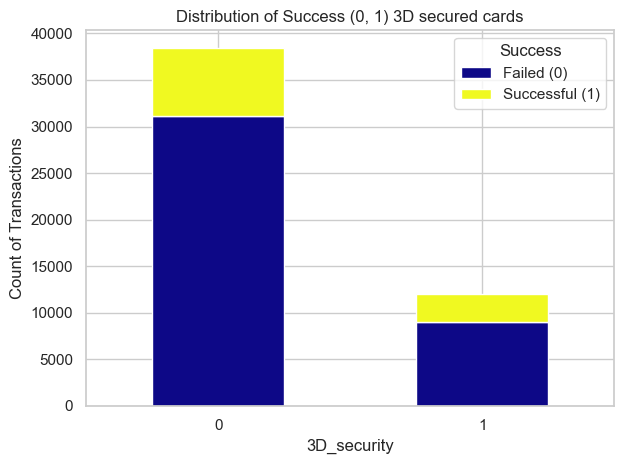

In [83]:
#Plotting the distribution of success among each PSP
plt.figure(figsize=(12, 6))
cards_3D.plot(kind='bar', stacked=True, colormap='plasma')

plt.title('Distribution of Success (0, 1) 3D secured cards')
plt.xlabel('3D_security')
plt.ylabel('Count of Transactions')
plt.legend(title='Success', labels=['Failed (0)', 'Successful (1)'])
plt.xticks(rotation=0)
plt.tight_layout()

**Analyzing Success(1) and failure(0) for each PSP in different countries**
- Success rate is highest among transactions made through Goldcard PSP in Austria and Switzerland followed by Germany.
- Simplecard PSP has the lowest success rate of transactions across all countries, followed by uk_card PSP.


In [84]:
# Calculate the success rate (1) and failure rate (0) for each country for each PSP
country_psp = data.groupby(['PSP', 'country', 'success']).size().unstack(fill_value=0).reset_index()
# Rename columns for better understanding
country_psp.columns = ['PSP', 'country', 'Failure (0)', 'Success (1)']
# Add a 'Total' column
country_psp['Total'] = country_psp['Failure (0)'] + country_psp['Success (1)']

grand_total = country_psp['Total'].sum()

country_psp['success%'] = round((country_psp['Success (1)'] / country_psp['Total'])*100,1)
country_psp['Failure%'] = round((country_psp['Failure (0)'] / country_psp['Total'])*100,1)

print(country_psp)

# print(grand_total)



           PSP      country  Failure (0)  Success (1)  Total  success%  \
0     Goldcard      Austria          335          248    583      42.5   
1     Goldcard      Germany         1175          764   1939      39.4   
2     Goldcard  Switzerland          395          291    686      42.4   
3    Moneycard      Austria         1286          368   1654      22.2   
4    Moneycard      Germany         3904         1056   4960      21.3   
5    Moneycard  Switzerland         1292          391   1683      23.2   
6   Simplecard      Austria         2031          383   2414      15.9   
7   Simplecard      Germany         6247         1184   7431      15.9   
8   Simplecard  Switzerland         2200          401   2601      15.4   
9      UK_Card      Austria         4174         1014   5188      19.5   
10     UK_Card      Germany        12819         3084  15903      19.4   
11     UK_Card  Switzerland         4324         1044   5368      19.4   

    Failure%  
0       57.5  
1      

In [85]:
# Create the pivot table
pivot_table = pd.pivot_table(data, 
                             values='amount', 
                             index=['country', 'success'], 
                             columns='PSP', 
                             aggfunc='count', 
                             fill_value=0, 
                             margins=True, 
                             margins_name='Grand Total')



# Reset the index
pivot_table = pivot_table.reset_index()

# Display the pivot table
print(pivot_table)

PSP      country success  Goldcard  Moneycard  Simplecard  UK_Card  \
0        Austria       0       335       1286        2031     4174   
1        Austria       1       248        368         383     1014   
2        Germany       0      1175       3904        6247    12819   
3        Germany       1       764       1056        1184     3084   
4    Switzerland       0       395       1292        2200     4324   
5    Switzerland       1       291        391         401     1044   
6    Grand Total              3208       8297       12446    26459   

PSP  Grand Total  
0           7826  
1           2013  
2          24145  
3           6088  
4           8211  
5           2127  
6          50410  


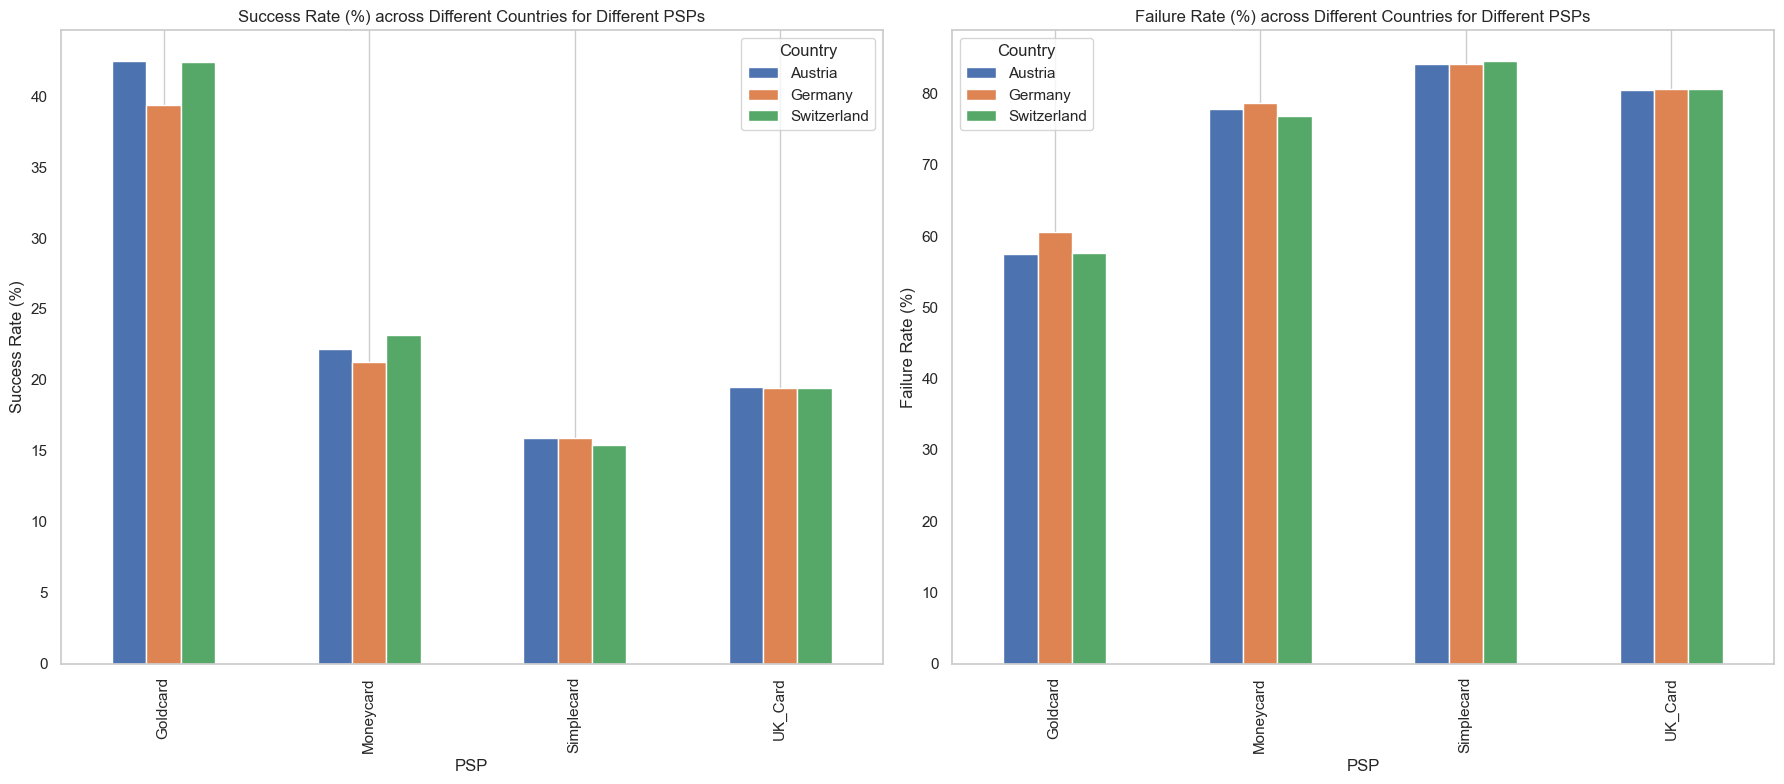

In [86]:
# Create a pivot table 
df_success = country_psp.pivot(index='PSP', columns='country', values='success%')
df_failure = country_psp.pivot(index='PSP', columns='country', values='Failure%')

# Set up the figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))

# Plot success rates
df_success.plot(kind='bar', ax=axes[0])
axes[0].set_title('Success Rate (%) across Different Countries for Different PSPs')
axes[0].set_ylabel('Success Rate (%)')
axes[0].set_xlabel('PSP')
axes[0].legend(title='Country')
axes[0].grid(axis='y')

# Plot failure rates
df_failure.plot(kind='bar', ax=axes[1])
axes[1].set_title('Failure Rate (%) across Different Countries for Different PSPs')
axes[1].set_ylabel('Failure Rate (%)')
axes[1].set_xlabel('PSP')
axes[1].legend(title='Country')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

### Feature Engineering

1. Factoring in Fees for successful and Failed transactions.
2. Computing avg fees of a transaction through each PSP in different countries.
3. Calculating success and failure rates for different PSPs in different countries

In [87]:
# Define the fees for each PSP
fees = {
    'PSP': ['Moneycard', 'Goldcard', 'UK_Card', 'Simplecard'],
    'fee_success': [5, 10, 3, 1],
    'fee_failure': [2, 5, 1, 0.5]
}

In [88]:
df_fees = pd.DataFrame(fees)
print(df_fees)

          PSP  fee_success  fee_failure
0   Moneycard            5          2.0
1    Goldcard           10          5.0
2     UK_Card            3          1.0
3  Simplecard            1          0.5


In [89]:
# Merge the DataFrames on 'PSP'
df_merged = pd.merge(country_psp, df_fees, on='PSP')
print(df_merged)

           PSP      country  Failure (0)  Success (1)  Total  success%  \
0     Goldcard      Austria          335          248    583      42.5   
1     Goldcard      Germany         1175          764   1939      39.4   
2     Goldcard  Switzerland          395          291    686      42.4   
3    Moneycard      Austria         1286          368   1654      22.2   
4    Moneycard      Germany         3904         1056   4960      21.3   
5    Moneycard  Switzerland         1292          391   1683      23.2   
6   Simplecard      Austria         2031          383   2414      15.9   
7   Simplecard      Germany         6247         1184   7431      15.9   
8   Simplecard  Switzerland         2200          401   2601      15.4   
9      UK_Card      Austria         4174         1014   5188      19.5   
10     UK_Card      Germany        12819         3084  15903      19.4   
11     UK_Card  Switzerland         4324         1044   5368      19.4   

    Failure%  fee_success  fee_failur

In [90]:
# Calculate the average transaction fee
df_merged['average_fee'] = (df_merged['success%'] * df_merged['fee_success'] / 100) + \
                           (df_merged['Failure%'] * df_merged['fee_failure'] / 100)
# Use this data for feature engineering
print(df_merged[['PSP', 'country', 'success%', 'Failure%', 'average_fee']])

           PSP      country  success%  Failure%  average_fee
0     Goldcard      Austria      42.5      57.5       7.1250
1     Goldcard      Germany      39.4      60.6       6.9700
2     Goldcard  Switzerland      42.4      57.6       7.1200
3    Moneycard      Austria      22.2      77.8       2.6660
4    Moneycard      Germany      21.3      78.7       2.6390
5    Moneycard  Switzerland      23.2      76.8       2.6960
6   Simplecard      Austria      15.9      84.1       0.5795
7   Simplecard      Germany      15.9      84.1       0.5795
8   Simplecard  Switzerland      15.4      84.6       0.5770
9      UK_Card      Austria      19.5      80.5       1.3900
10     UK_Card      Germany      19.4      80.6       1.3880
11     UK_Card  Switzerland      19.4      80.6       1.3880


In [91]:
# Merge the main dataset with the additional data on 'PSP' and 'country'
data2 = pd.merge(data, df_merged, on=['PSP', 'country'], how='left')
data2.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card,Failure (0),Success (1),Total,success%,Failure%,fee_success,fee_failure,average_fee
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,12819,3084,15903,19.4,80.6,3,1.0,1.3880
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,12819,3084,15903,19.4,80.6,3,1.0,1.3880
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,12819,3084,15903,19.4,80.6,3,1.0,1.3880
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,12819,3084,15903,19.4,80.6,3,1.0,1.3880
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,2031,383,2414,15.9,84.1,1,0.5,0.5795


**Several payment attempts of the same purchase**

In this we consider payments made from the same country with the same amount, within one minute of each other.
These are grouped together

In [92]:
# make a copy of the original data
data3 = data.copy(deep=True)

In [93]:
# Sort by country, amount, and timestamp
from datetime import datetime, timedelta

data3.sort_values(by=['country', 'amount', 'tmsp'], inplace=True)

In [94]:
# Initialize an empty list to store the grouped transactions
grouped_transactions = []

# Initialize variables to keep track of the current group
group = []
current_country = None
current_amount = None

# Loop through the dataframe and group transactions
for idx, row in data3.iterrows():
    if group:
        prev_row = group[-1]
        # Check if the current transaction is within one minute of the previous one
        if (row['amount'] == prev_row['amount'] and
            row['country'] == prev_row['country'] and
            (row['tmsp'] - prev_row['tmsp']) <= timedelta(minutes=1)):
            group.append(row)
        else:
            # Process the current group
            grouped_transactions.append({
                'first_psp': group[0]['PSP'],
                'last_psp': group[-1]['PSP'],
                'country': group[0]['country'],
                'amount': group[0]['amount'],
                'tmsp': group[0]['tmsp'],
                'success': any(g['success'] == 1 for g in group)  # If any transaction in the group is successful
            })
            # Start a new group
            group = [row]
    else:
        group = [row]

# Add the last group
if group:
    grouped_transactions.append({
        'first_psp': group[0]['PSP'],
        'last_psp': group[-1]['PSP'],
        'country': group[0]['country'],
        'amount': group[0]['amount'],
        'tmsp': group[0]['tmsp'],
        'success': any(g['success'] == 1 for g in group)  # If any transaction in the group is successful
    })

# Convert the grouped transactions to a DataFrame
df_grouped = pd.DataFrame(grouped_transactions)

print(df_grouped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27337 entries, 0 to 27336
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   first_psp  27337 non-null  object        
 1   last_psp   27337 non-null  object        
 2   country    27337 non-null  object        
 3   amount     27337 non-null  int64         
 4   tmsp       27337 non-null  datetime64[ns]
 5   success    27337 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB
None


In [95]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27337 entries, 0 to 27336
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   first_psp  27337 non-null  object        
 1   last_psp   27337 non-null  object        
 2   country    27337 non-null  object        
 3   amount     27337 non-null  int64         
 4   tmsp       27337 non-null  datetime64[ns]
 5   success    27337 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [96]:
# check the class counts for target
df_grouped['success'].value_counts()

success
False    17112
True     10225
Name: count, dtype: int64

In [97]:

data4 = pd.merge(data2, df_grouped, on=['tmsp', 'country', 'amount'], how='right')
data4.head(10)

,Unnamed: 0,tmsp,country,amount,success_x,PSP,3D_secured,card,Failure (0),Success (1),Total,success%,Failure%,fee_success,fee_failure,average_fee,first_psp,last_psp,success_y
0,9238,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,1286,368,1654,22.2,77.8,5,2.0,2.6660,Moneycard,Simplecard,False
1,22742,2019-01-27 14:01:11,Austria,6,1,Simplecard,0,Master,2031,383,2414,15.9,84.1,1,0.5,0.5795,Simplecard,Simplecard,True
2,33737,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,Simplecard,False
3,40539,2019-02-16 08:24:40,Austria,6,1,UK_Card,1,Master,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,UK_Card,True
4,21179,2019-01-25 04:18:26,Austria,7,0,Moneycard,0,Master,1286,368,1654,22.2,77.8,5,2.0,2.6660,Moneycard,Moneycard,False
5,23798,2019-01-28 23:48:19,Austria,7,0,UK_Card,0,Master,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,UK_Card,False
6,31712,2019-02-06 04:09:05,Austria,7,0,UK_Card,0,Diners,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,UK_Card,True
7,36838,2019-02-12 00:25:52,Austria,7,1,Simplecard,1,Diners,2031,383,2414,15.9,84.1,1,0.5,0.5795,Simplecard,Simplecard,True
8,49588,2019-02-27 23:46:42,Austria,7,0,UK_Card,0,Master,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,Goldcard,False
9,21448,2019-01-25 13:52:53,Austria,8,1,UK_Card,0,Diners,4174,1014,5188,19.5,80.5,3,1.0,1.3900,UK_Card,UK_Card,True


In [98]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27498 entries, 0 to 27497
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   27498 non-null  int64         
 1   tmsp         27498 non-null  datetime64[ns]
 2   country      27498 non-null  object        
 3   amount       27498 non-null  int64         
 4   success_x    27498 non-null  int64         
 5   PSP          27498 non-null  object        
 6   3D_secured   27498 non-null  int64         
 7   card         27498 non-null  object        
 8   Failure (0)  27498 non-null  int64         
 9   Success (1)  27498 non-null  int64         
 10  Total        27498 non-null  int64         
 11  success%     27498 non-null  float64       
 12  Failure%     27498 non-null  float64       
 13  fee_success  27498 non-null  int64         
 14  fee_failure  27498 non-null  float64       
 15  average_fee  27498 non-null  float64       
 16  firs

In [99]:
# select few columns for model building
data5 = data4[['tmsp','country','amount','success_x', 'PSP', '3D_secured',
               'card', 'success%','Failure%','fee_success','fee_failure','average_fee', 'first_psp','last_psp']]

In [100]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27498 entries, 0 to 27497
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tmsp         27498 non-null  datetime64[ns]
 1   country      27498 non-null  object        
 2   amount       27498 non-null  int64         
 3   success_x    27498 non-null  int64         
 4   PSP          27498 non-null  object        
 5   3D_secured   27498 non-null  int64         
 6   card         27498 non-null  object        
 7   success%     27498 non-null  float64       
 8   Failure%     27498 non-null  float64       
 9   fee_success  27498 non-null  int64         
 10  fee_failure  27498 non-null  float64       
 11  average_fee  27498 non-null  float64       
 12  first_psp    27498 non-null  object        
 13  last_psp     27498 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 2.9+ MB


In [101]:
df = data5.copy(deep=True)

In [102]:
# Extract time of day as a new feature
df.loc[:,'time_of_day'] = df['tmsp'].dt.hour

In [103]:
# Extract day_of week as another feature
df.loc[:, 'day_of_week_name'] = df['tmsp'].dt.day_name()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27498 entries, 0 to 27497
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tmsp              27498 non-null  datetime64[ns]
 1   country           27498 non-null  object        
 2   amount            27498 non-null  int64         
 3   success_x         27498 non-null  int64         
 4   PSP               27498 non-null  object        
 5   3D_secured        27498 non-null  int64         
 6   card              27498 non-null  object        
 7   success%          27498 non-null  float64       
 8   Failure%          27498 non-null  float64       
 9   fee_success       27498 non-null  int64         
 10  fee_failure       27498 non-null  float64       
 11  average_fee       27498 non-null  float64       
 12  first_psp         27498 non-null  object        
 13  last_psp          27498 non-null  object        
 14  time_of_day       2749

### Further Visualizations with the new Features

Additional analysis into success and fees is done to gain insights into the factors that influence both.
1. Visualizing success rate for each hour of day for each PSP
2. visualizing success rate on each day of week for different PSPs.
3. visualize average fee associated with transacions via each PSP.

         PSP  time_of_day  success_rate
0   Goldcard            0     40.278161
1   Goldcard            1     40.830208
2   Goldcard            2     40.702198
3   Goldcard            3     40.536250
4   Goldcard            4     40.577228
..       ...          ...           ...
91   UK_Card           19     19.419373
92   UK_Card           20     19.421585
93   UK_Card           21     19.418957
94   UK_Card           22     19.420748
95   UK_Card           23     19.420918

[96 rows x 3 columns]


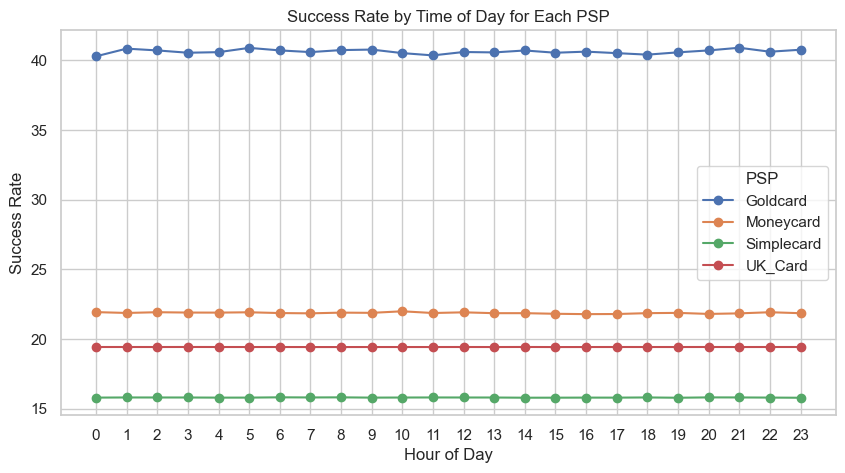

In [105]:
# Calculate success rate for each hour and each PSP
agg_data = df.groupby(['PSP', 'time_of_day']).agg(success_rate=('success%', 'mean')).reset_index()
print(agg_data)

# Set the plot style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))

# Loop through each PSP and plot its success rate over time of day
for psp in agg_data['PSP'].unique():
    psp_data = agg_data[agg_data['PSP'] == psp]
    plt.plot(psp_data['time_of_day'], psp_data['success_rate'], marker='o', label=psp)

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Success Rate')
plt.title('Success Rate by Time of Day for Each PSP')
plt.xticks(range(0, 24))  # Ensure x-axis shows all hours
plt.legend(title='PSP')

# Show the plot
plt.show()

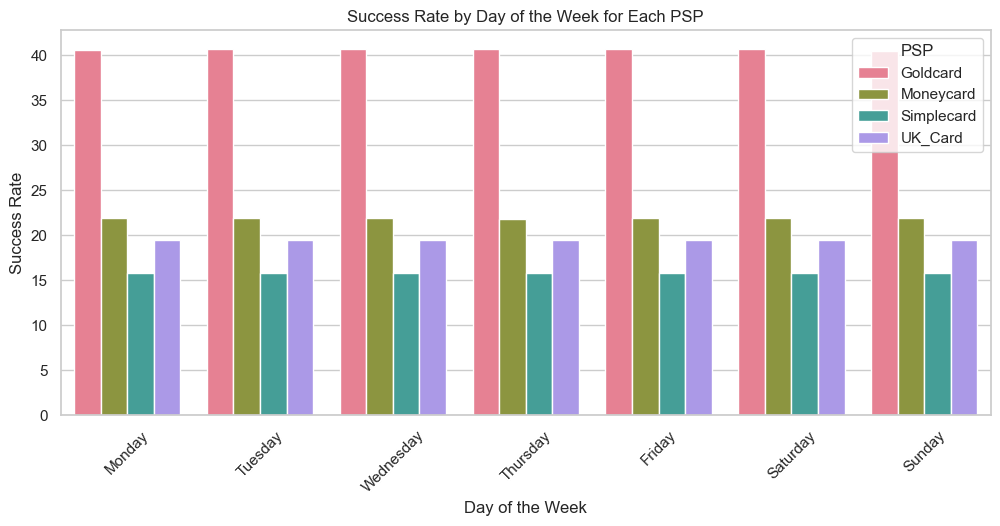

In [106]:

#Calculate success rate for each day of the week and each PSP
agg_data1 = df.groupby(['PSP', 'day_of_week_name']).agg(success_rate=('success%', 'mean')).reset_index()

# Ensure day_of_week is in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
agg_data1['day_of_week_name'] = pd.Categorical(agg_data1['day_of_week_name'], categories=days_order, ordered=True)
agg_data1.sort_values(by=['PSP', 'day_of_week_name'], inplace=True)


# Set the plot style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 5))

# Create a bar plot
sns.barplot(data=agg_data1, x='day_of_week_name', y='success_rate', hue='PSP',palette="husl")

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate')
plt.title('Success Rate by Day of the Week for Each PSP')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='PSP')
plt.show()

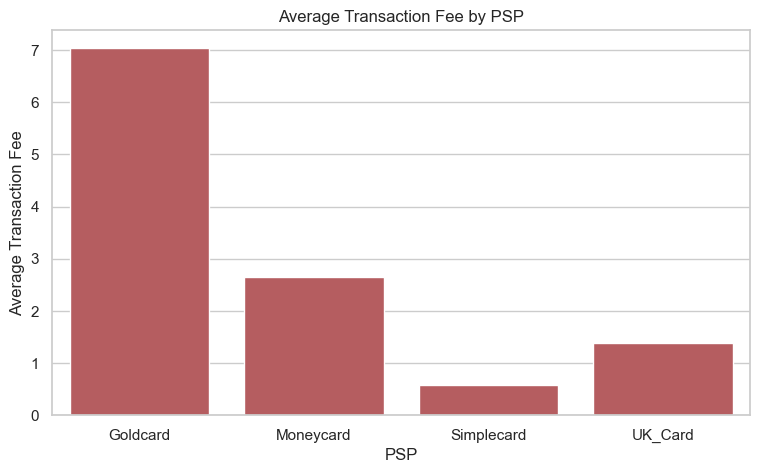

In [107]:
# Calculate average transaction fee for each PSP
avg_fees = df.groupby('PSP')['average_fee'].mean().reset_index()

# Set the plot style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(9, 5))

# Create a bar plot
sns.barplot(data=avg_fees, x='PSP', y='average_fee',color='r')

# Add labels and title
plt.xlabel('PSP')
plt.ylabel('Average Transaction Fee')
plt.title('Average Transaction Fee by PSP')

# Show the plot
plt.show()

## Data Preprocessing

The data is prepared for building the model by;
1. Scaling the numerical feartures such that they fall within the same range.
2. Encoding categorical variables
3. Imputing any mssing values by use of Median 
5. checking for correlated features

The preprocessing follows the following steps.
1. Define the processing pipeline: Transformers for numerical and categorical features.
2. Fit and Transform the Data: Fit the preprocessor on the DataFrame and transform it.
3. Retrieve the Actual Feature Names:concatenate the numerical feature names and the output feature names of the OneHotEncoder.

In [108]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [109]:
print(df.columns)

Index(['tmsp', 'country', 'amount', 'success_x', 'PSP', '3D_secured', 'card',
       'success%', 'Failure%', 'fee_success', 'fee_failure', 'average_fee',
       'first_psp', 'last_psp', 'time_of_day', 'day_of_week_name'],
      dtype='object')


In [110]:
df1 = df.copy(deep=True)

In [111]:
df1.head()

,tmsp,country,amount,success_x,PSP,3D_secured,card,success%,Failure%,fee_success,fee_failure,average_fee,first_psp,last_psp,time_of_day,day_of_week_name
0,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,22.2,77.8,5,2.0,2.6660,Moneycard,Simplecard,3,Thursday
1,2019-01-27 14:01:11,Austria,6,1,Simplecard,0,Master,15.9,84.1,1,0.5,0.5795,Simplecard,Simplecard,14,Sunday
2,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,19.5,80.5,3,1.0,1.3900,UK_Card,Simplecard,5,Friday
3,2019-02-16 08:24:40,Austria,6,1,UK_Card,1,Master,19.5,80.5,3,1.0,1.3900,UK_Card,UK_Card,8,Saturday
4,2019-01-25 04:18:26,Austria,7,0,Moneycard,0,Master,22.2,77.8,5,2.0,2.6660,Moneycard,Moneycard,4,Friday


In [112]:
# Define numerical and categorical features
numerical_features = ['amount', 'fee_success', 'fee_failure', 'average_fee', 'time_of_day', 'success%']
categorical_features = ['country', 'PSP', '3D_secured', 'card', 'first_psp', 'last_psp', 'day_of_week_name']

In [113]:
# Define transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [114]:

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
df_preprocessed = preprocessor.fit_transform(df1)

In [115]:
df_preprocessed

array([[-2.03700858,  0.70812909,  0.56220382, ...,  1.        ,
         0.        ,  0.        ],
       [-2.03700858, -1.02111328, -0.73513155, ...,  0.        ,
         0.        ,  0.        ],
       [-2.03700858, -0.15649209, -0.30268642, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.04802497, -1.02111328, -0.73513155, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.06882265, -0.15649209, -0.30268642, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.08962033, -0.15649209, -0.30268642, ...,  1.        ,
         0.        ,  0.        ]])

In [116]:
df_preprocessed.shape

(27498, 33)

In [117]:
# Get feature names
numerical_feature_names = numerical_features
print(numerical_feature_names)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)
print(categorical_feature_names)
print(len(all_feature_names))

['amount', 'fee_success', 'fee_failure', 'average_fee', 'time_of_day', 'success%']
['country_Austria' 'country_Germany' 'country_Switzerland' 'PSP_Goldcard'
 'PSP_Moneycard' 'PSP_Simplecard' 'PSP_UK_Card' '3D_secured_0'
 '3D_secured_1' 'card_Diners' 'card_Master' 'card_Visa'
 'first_psp_Goldcard' 'first_psp_Moneycard' 'first_psp_Simplecard'
 'first_psp_UK_Card' 'last_psp_Goldcard' 'last_psp_Moneycard'
 'last_psp_Simplecard' 'last_psp_UK_Card' 'day_of_week_name_Friday'
 'day_of_week_name_Monday' 'day_of_week_name_Saturday'
 'day_of_week_name_Sunday' 'day_of_week_name_Thursday'
 'day_of_week_name_Tuesday' 'day_of_week_name_Wednesday']
33


In [118]:
# Create a DataFrame with proper column names
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_feature_names)

print(df_preprocessed)

         amount  fee_success  fee_failure  average_fee  time_of_day  success%  \
0     -2.037009     0.708129     0.562204     0.510632    -1.230336  0.274204   
1     -2.037009    -1.021113    -0.735132    -0.763116     0.357136 -0.751001   
2     -2.037009    -0.156492    -0.302686    -0.268329    -0.941705 -0.165170   
3     -2.037009    -0.156492    -0.302686    -0.268329    -0.508758 -0.165170   
4     -2.026610     0.708129     0.562204     0.510632    -1.086020  0.274204   
...         ...          ...          ...          ...          ...       ...   
27493  2.881644    -0.156492    -0.302686    -0.269550     0.790083 -0.181443   
27494  2.892042    -0.156492    -0.302686    -0.269550     1.367346 -0.181443   
27495  3.048025    -1.021113    -0.735132    -0.764642    -1.086020 -0.832367   
27496  3.068823    -0.156492    -0.302686    -0.269550     1.367346 -0.181443   
27497  3.089620    -0.156492    -0.302686    -0.269550    -1.086020 -0.181443   

       country_Austria  cou

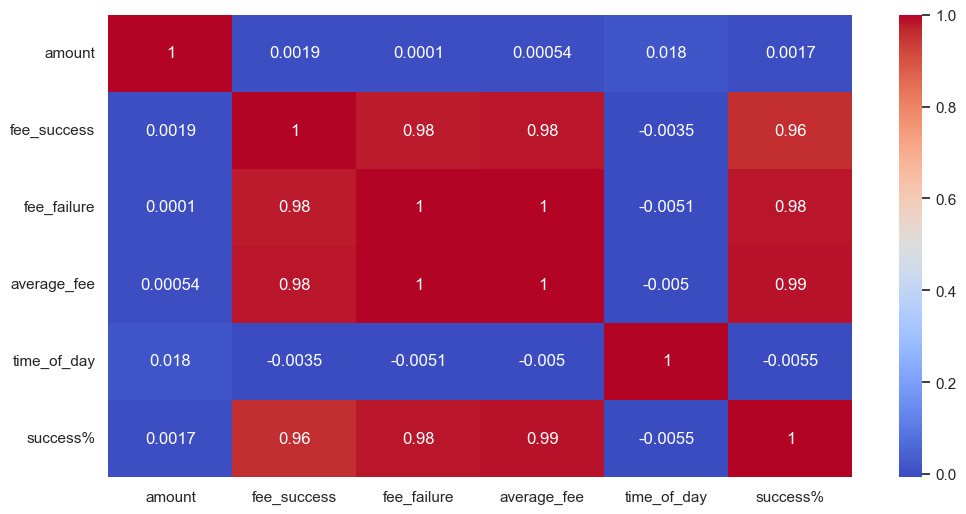

In [119]:
# checking for correlations: Compute the correlation matrix for correlations among numerical features
corr_matrix = df1[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Correlation Analysis

1. There is a very strong positive correlation between success% and fee_success. This suggests that higher success rates might be associated with higher fees for successful transactions, possibly indicating a trade-off between transaction success and cost. Also the strong positive correlation between success% and average_fee indicates that higher transaction success rates might be associated with higher average fees.

2. A very weak negative correlation exists between time_of_day and fee_success and fee_failure indicating almost no relationship between these two variables.

3. Multi-Collinearity: High multi-collinearity is evident among fee_success, fee_failure, and average_fee, which may need to be addressed in modeling to avoid redundancy and instability.


### Feature Importance and Selection

The most important features are computed by training a random forest classifier. 
This is based on mean decrease in impurity and the importance of a feature is the average of all the impurity decreases attributed to that feature across all trees.
Feature importances are provided by the fitted attribute,feature_importances_ .

In [120]:
# compute feature importance using Random forests

from sklearn.ensemble import RandomForestClassifier

# Assume target variable is 'success_x'
X = df_preprocessed
y = df1['success_x']

# Fit a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Map importances to feature names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)


                       feature  importance
0                       amount    0.424165
4                  time_of_day    0.261059
25            last_psp_UK_Card    0.030579
22           last_psp_Goldcard    0.023042
24         last_psp_Simplecard    0.020302
17                   card_Visa    0.015961
23          last_psp_Moneycard    0.015921
5                     success%    0.014713
16                 card_Master    0.014306
14                3D_secured_1    0.014202
13                3D_secured_0    0.013755
15                 card_Diners    0.011360
3                  average_fee    0.010663
1                  fee_success    0.010198
31    day_of_week_name_Tuesday    0.010086
32  day_of_week_name_Wednesday    0.010071
30   day_of_week_name_Thursday    0.010007
28   day_of_week_name_Saturday    0.009936
27     day_of_week_name_Monday    0.009542
26     day_of_week_name_Friday    0.009273
29     day_of_week_name_Sunday    0.008899
2                  fee_failure    0.007550
7          

In [121]:
print(X.shape)

(27498, 33)


In [122]:
# Select top-k features to use for building model(e.g., top 15)
top_k = 15
selected_features = feature_importances.head(top_k)['feature'].tolist()
print(selected_features)

['amount', 'time_of_day', 'last_psp_UK_Card', 'last_psp_Goldcard', 'last_psp_Simplecard', 'card_Visa', 'last_psp_Moneycard', 'success%', 'card_Master', '3D_secured_1', '3D_secured_0', 'card_Diners', 'average_fee', 'fee_success', 'day_of_week_name_Tuesday']


## BUILDING THE MODEL

A Baseline model and accurate model are built. For the choice of accurate model, the hyperparameters are tuned to improve the accuracy.
1. Baseline logistic regression model using selected features

In [123]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]
y = df1['success_x']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print(f"Original dataset shape: {Counter(y_train)}")
# print(f"Resampled dataset shape: {Counter(y_train_smote)}")

# Initialize and train the model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# # Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6243636363636363
              precision    recall  f1-score   support

           0       0.85      0.65      0.73      4405
           1       0.27      0.53      0.36      1095

    accuracy                           0.62      5500
   macro avg       0.56      0.59      0.55      5500
weighted avg       0.73      0.62      0.66      5500

[[2853 1552]
 [ 514  581]]


## Fitting other classification models
4 different algorithms are fitted in order to get a more accurate predictive model that fulfills business requirements.
Algorithms include; SVM, Gradient_boost, XGboost and Random forest classifier.

In [124]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import xgboost as xgb


X = df1.drop(['success_x', 'tmsp'], axis=1)
y = df1['success_x']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X1_train_smote, y1_train_smote = smote.fit_resample(X_train, y_train)

Fitting the 4 Models and Evaluating them by respective accuracy score and the Classification Reports. The associated probabilities are also 
printed(first 10) to provide an idea of likelihood of success/ failure of certain transactions.

In [125]:
# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X1_train_smote, y1_train_smote)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1] 
print("Random Forest Classifier:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Predicted Probabilities (first 10):", rf_probs[:10])

# 2. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X1_train_smote, y1_train_smote)
gb_preds = gb_model.predict(X_test)
gb_probs = gb_model.predict_proba(X_test)[:, 1] 
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_preds))
print("Accuracy:", accuracy_score(y_test, gb_preds))
print("Predicted Probabilities (first 10):", gb_probs[:10])

# 3. XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X1_train_smote, y1_train_smote)
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  
print("\nXGBoost Classifier:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Predicted Probabilities (first 10):", xgb_probs[:10])

# 4. Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X1_train_smote, y1_train_smote)
svm_preds = svm_model.predict(X_test)
print("\nSupport Vector Machine Classifier:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4364
           1       0.42      0.53      0.46      1136

    accuracy                           0.75      5500
   macro avg       0.64      0.67      0.65      5500
weighted avg       0.77      0.75      0.76      5500

Accuracy: 0.7494545454545455
Predicted Probabilities (first 10): [0.31       0.25       0.42       0.56       0.         0.
 0.18       0.73583333 0.29       0.        ]

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4364
           1       0.45      0.41      0.43      1136

    accuracy                           0.78      5500
   macro avg       0.65      0.64      0.64      5500
weighted avg       0.77      0.78      0.77      5500

Accuracy: 0.7756363636363637
Predicted Probabilities (first 10): [0.55176956 0.34054424 0.37558592 0.39767002 0.3166872

### Model results interpretation (XGBoost)

The overall accuracy of 0.82 indicates that the model correctly predicts whether a transaction will be a success or failure 82% of the time.

### Hyperparameter tuning for XGboost model

I chose XGBoost as the best model, and performed hyperparameter tuning using randomized search to find the best parameters for model fitting. 
The algorithm has built-in regularization to prevent overfitting and it's highly flexible with a wide range of hyperparameters for tuning.
There's a slight improvement in the accuracy Score for the model 82%

In [126]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4364
           1       0.87      0.16      0.27      1136

    accuracy                           0.82      5500
   macro avg       0.85      0.58      0.59      5500
weighted avg       0.83      0.82      0.77      5500

Accuracy: 0.8221818181818182


## Saving the model and Deployment
 The model and pipeline are saved as a pickle file then read when trying to make predictions on unseen data 
 as demonstrated below.

In [127]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Define preprocessing pipeline
numerical_features = ['amount', 'fee_success', 'average_fee', 'time_of_day']  
categorical_features = ['3D_secured', 'card','last_psp']  

# select few columns
selected_cols = ['amount', 'fee_success', 'average_fee', 'time_of_day', 'card','3D_secured','last_psp']

#define features and target
X_1 = df1[selected_cols]
y_1 = df1['success_x']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first',  handle_unknown='ignore'), categorical_features)
    ])

# Define the full pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42))
])


# Train the pipeline
model_pipeline.fit(X_1, y_1)

# Save the pipeline
with open('model_pipeline_xgb.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)


In [128]:
print(type(X_1))

<class 'pandas.core.frame.DataFrame'>


In [129]:
import pickle
import pandas as pd

# Load the pipeline
with open('model_pipeline_xgb.pkl', 'rb') as f:
    model_pipeline = pickle.load(f)

#  `new_data` is the new data for prediction
new_data = pd.DataFrame({
    'amount': [400, 32],  
    'fee_success': [3.0, 23],
    'average_fee': [5.6, 6.7],
    'time_of_day': [14, 1],
    'card': ['Visa', 'Master'],
    '3D_secured': [0, 1],
    'last_psp': ['Simplecard',  'Goldcard'],
    
})

# Make predictions
predictions = model_pipeline.predict(new_data)
predicted_probabilities = model_pipeline.predict_proba(new_data)

print("Predictions:", predictions)
print("Predicted Probabilities:", predicted_probabilities)


Predictions: [0 1]
Predicted Probabilities: [[0.99847573 0.00152429]
 [0.12512094 0.87487906]]
